# Aproksymacja średniokwadratowa wielomianami algebraicznymi

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Bartosz Kucharz

# Funkcja zadana do analizy

$$k=3\\
m=0.2\\
f(x)=\sin\left(\frac{xk}{\pi}\right)e^{\frac{-mx}{\pi}}
$$

In [61]:
A = -np.pi*np.pi
B = 2*np.pi*np.pi

def f8(x):
    k=3
    m=0.2
    return np.sin(x*k/np.pi)*np.exp(-m*x/np.pi)

In [62]:
def get_nodes(function, n, nodes_func):
    x = nodes_func(A, B, n)
    y = np.vectorize(function)(x)
    return x, y

def  uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

def chebyshev_nodes(a, b, n):
    return np.vectorize(lambda x : 0.5*(a+b) + .5*(b-a)*np.cos((2*x - 1)*np.pi/(2*n)))(np.arange(1, n+1))

def trigonometric_nodes(a, b, n):
    L = n/2
    i = np.arange(0, 2*L)
    return np.pi*i/L

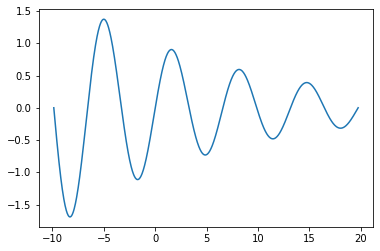

In [63]:
X, Y = get_nodes(f8, 1000, uniform_nodes)
plt.plot(X, Y)

# Błąd przybliżenia
$$\frac{1}{n} \left | \left | F(x)-f(x)   \right | \right | = \frac{1}{n}\sum_{i=0}^n w(x_i)[F(x_i)-f(x_i)]^2$$


# Ekperymenty

In [131]:
def polynomial_approx(x, y, n, degree, w=None):
    if w is None:
        w = np.ones(x.shape)
        
    matrix = np.empty((degree+1, degree+1))
    for i in range(degree+1):
        for j in range(degree+1):
            matrix[i, j] = np.sum(w * np.power(x, j+i))
            
    free = np.empty((degree+1))
    for i in range(degree+1):
        free[i] = np.sum(w * y * np.power(x, i))
        
    a = np.linalg.solve(matrix, free)

    def nf(nx):
        result = 0
        for i in range(a.shape[0]):
            result+=a[i]*np.power(nx, i)
        return result
        
    nx = uniform_nodes(A, B, n)
    ny = np.vectorize(nf)(nx)
    
    e_y = np.vectorize(nf)(x)
    error = y - e_y
    error = np.power(error, 2)
    error = np.mean(error)
    
    return nx, ny, error

In [132]:
def test_approx(f, nodes_no, degrees):
    table = PrettyTable()
    table.field_names = ['Liczba węzłów', 'Liczba funkcji bazowych', 'Błąd przybliżenia']
    
    for node_no in nodes_no:
        for degree in degrees:
            if degree == node_no:
                break
            
            x, y = get_nodes(f, node_no, uniform_nodes)
            nx, ny, error = polynomial_approx(x, y, 1000, degree)
            table.add_row([node_no, degree, round(error, 15)])
            
    print(table)
    

In [133]:
test_approx(f8, [5, 10, 15, 25, 50, 100, 200], range(1, 9))

+---------------+-------------------------+-------------------+
| Liczba węzłów | Liczba funkcji bazowych | Błąd przybliżenia |
+---------------+-------------------------+-------------------+
|       5       |            1            | 0.117893566686667 |
|       5       |            2            | 0.020534593162919 |
|       5       |            3            | 0.000134146571183 |
|       5       |            4            |        0.0        |
|       10      |            1            |        0.0        |
|       10      |            2            |        0.0        |
|       10      |            3            |        0.0        |
|       10      |            4            |        0.0        |
|       10      |            5            |        0.0        |
|       10      |            6            |        0.0        |
|       10      |            7            |        0.0        |
|       10      |            8            |        0.0        |
|       15      |            1          

## Liczba węzłów 10

Błąd przybliżenia 3.3229e-32


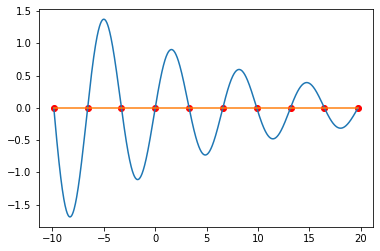

In [140]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 10, uniform_nodes)
nx, ny , error = polynomial_approx(x, y, 1000, 5)

plt.plot(X, Y)
plt.scatter(x, y, c='red')
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

W powyższym przypadku dla liczby węzłów równej 10, węzły niefortunnie ułożyły się prawie w lini prostej, przez co błąd przybliżenia dla 10 węzłów wyniósł 0.

## Wybrane wykresy

### Liczba węzłow 15, liczba funkcji bazowych 5

Błąd przybliżenia 0.40367


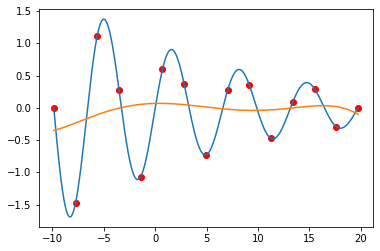

In [157]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 15, uniform_nodes)
nx, ny , error = polynomial_approx(x, y, 1000, 5)

plt.plot(X, Y)
plt.scatter(x, y, c='red')
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

### Liczba węzłow 15, liczba funkcji bazowych 8

Błąd przybliżenia 0.26188


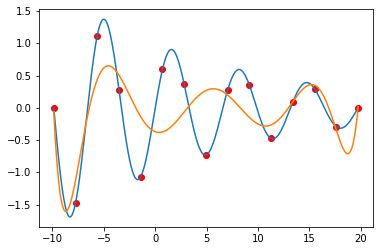

In [158]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 15, uniform_nodes)
nx, ny , error = polynomial_approx(x, y, 1000, 8)

plt.plot(X, Y)
plt.scatter(x, y, c='red')
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

### Liczba węzłow 100, liczba funkcji bazowych 8

Błąd przybliżenia 0.27724


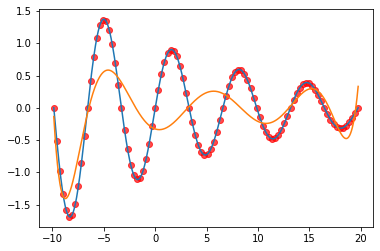

In [159]:
X,Y = get_nodes(f8, 1000, uniform_nodes)
x, y = get_nodes(f8, 100, uniform_nodes)
nx, ny , error = polynomial_approx(x, y, 1000, 8)

plt.plot(X, Y)
plt.scatter(x, y, c='red', alpha=.7)
plt.plot(nx, ny)

print(f'Błąd przybliżenia {error:.5}')

Analizując wyniki można zauważyć, że zwiększenie liczby funkcji bazowych zwiększa dokładność aproksymacji natomiast liczba węzłów nie ma wpływu na błąd przybliżenia.